<h1>Extract text from resume</h1>

In [442]:

#!pip install sentence_transformers

In [443]:
import string
import re
import nltk
import statistics
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import math

In [444]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [445]:
#Global arrays
score_array=[]
top_institutes = ["IIT","NIT","IIIT","BITS"]
equvalent_courses = ["B.E","MSC","MCA","B.Tech","Bachelors","Information science","AI","ML"]
top_banks = ["JP Morgan","Goldman sachs","Axis bank","HSBC","VISA","PayPal","PWC","HDFC Bank"]
prefer = False

Data cleaning

In [446]:
def start(actual,expected):
  removeStopwords(actual,expected)

In [447]:
def checkTopInstitutes(education,requiredEducation):
  for institute in top_institutes:
    if institute in education:
      education = requiredEducation
      break
    else:
      education.join(',')

In [448]:
def checkEquvalentCourses(education,requiredEducation):
  for course in equvalent_courses:
    if course in education:
      education = requiredEducation
    else:
      education.join(',')

In [449]:
def preferExperience(candidateExperience):
  candidateExperience = candidateExperience.split()
  for bank in top_banks:
    if bank in candidateExperience:
      return True

In [450]:
def removeStopwords(actual,expected):
  stop_words = set(stopwords.words('english'))
  candidateExperienceTokens = word_tokenize(actual)
  requiredExperienceTokens = word_tokenize(expected)
  cleanCandidateExperience = [word for word in candidateExperienceTokens if not word in stopwords.words()]
  cleanrequiredExperience = [word for word in requiredExperienceTokens if not word in stopwords.words()]
  lemmatisation(cleanCandidateExperience,cleanrequiredExperience)

In [451]:
def lemmatisation(actual,expected):
  CandidateExperience = ' '.join(map(str, actual))
  RequiredExperience = ' '.join(map(str, expected))
  lemmatizer = WordNetLemmatizer()
  lemCandidateExperience =lemmatizer.lemmatize(CandidateExperience)
  lemRequiredExperience = lemmatizer.lemmatize(RequiredExperience)
  removePunctuation(lemCandidateExperience,lemRequiredExperience)

In [452]:
def removePunctuation(actual,expected):
  noPunCandidateExperience = ""
  noPunRequiredExperience = ""
  for character in actual:
      if character.isalnum():
          noPunCandidateExperience += character
      else:
        noPunCandidateExperience += " "
        
  for character in expected:
      if character.isalnum():
          noPunRequiredExperience += character
      else:
        noPunRequiredExperience += " "
  model(noPunCandidateExperience,noPunRequiredExperience)

In [453]:
def drawPieChart():
  y=[]
  for i in range(len(score_array)):
    if(i==2):
      y.append(score_array[i]*1.5)
    else:
      y.append(score_array[i])
  mylabels = ["Skills", "Education", "Experience"]
  explode = (0, 0, 0.1 ) 
  plt.pie(y, labels = mylabels, explode=explode, shadow=True)
  plt.title("Distribution of attributes of the Candidate.")
  plt.show() 

In [454]:
def analytics(prefer = False):
  print("\n")
  print("REPORT")
  final_score=0
  for score in score_array:
    final_score+=score
  avg = (final_score/300)*100
  score_array.append(avg)
  s1=score_array[0]/2
  s2=score_array[1]/2
  s3=score_array[0]
  resume_score = ((s1+s1+s3)/200)*100
  score_array.append(math.floor(resume_score))

  if(avg>min_criteria):
    score_array.append("PASSED")
  elif(avg>=70 and avg<min_criteria):
    score_array.append("Manual review needed")
  else:
    score_array.append("FAILED")

  if(prefer):
    print("hi")
    score_array.append("Has banking experience.")

  if(score_array[1]<70):
    score_array.append("Candidate does not meet the Education criteria.")

  print(tabulate([score_array], headers=["Skills", "Education", "Experience","AVG","Resume score","Automatic screening","Insights"]))
  #clear data
  score_array.clear()

<h3>Modelling</h3>

In [455]:
def model(actual,expected):
  vectorizer = TfidfVectorizer()
  vectorizer.fit([actual])
  vectorizer.fit([expected])
  vectorA = vectorizer.transform([actual])
  vectorB = vectorizer.transform([expected])
  similarity_index = cosine_similarity(vectorA, vectorB)
  final_score = similarity_index[0][0]*100
  score_array.append(int(final_score))


In [456]:
def sentenceTranformerModel(actual,expected):
  modelName = "bert-base-nli-mean-tokens"
  model = SentenceTransformer(modelName)
  vectorA = model.encode([actual])
  vectorB = model.encode([expected])
  similarity_index = cosine_similarity(vectorA, vectorB)
  final_score = similarity_index[0][0]*100
  score_array.append(int(final_score))

<h3>Analysis</h3>


Make changes below to describe what is needed.

## **Example 1 - Societe generale**

In [457]:
#Candidate
skills = "JAVA, SPRING BOOT, Hybernate, SQL, DBMS, Angular, GIT, AI/ML, Jira, Jenkins, Kubernetes, node.js"
education = "BE in computer science from BMS"

In [458]:
requiredExperience = "Deep expertise and hands on experience in Core java. · Hands-on experience with at least 2 to 12 years in Spring and Hibernate technologies. · Hands-on experience with at least 2 to 12 years in web GUI development using HTML, CSS, ReactJS, Bootstrap · Clear understanding of Software Development life cycle and process Oriented. Would be great if worked on Agile or Continuous Delivery (CD) based projects before. · Good fundamentals in Core Programming, Object Oriented design & Design patterns · Should have good hands -on experience on the fundamentals of how modern web works with SPA, Restful APIs and OAuth/OpenID Connect protocols · Experience in creating & executing unit tests using test driven approach with JUnit or any other equivalent. · Good to have exposure to Investment banking domain, ML & Cloud technologies."

candidateExperience = "HSBC - Have Over 6+ years of experience in core java, Spring and Hibernate technologies. · Have over 5+ years of experience in web GUI development using HTML, CSS, ReactJS, Bootstrap. Experienced working with Agile and Continuous Delivery projects before. · Have good experience working on SPA, Restful APIs and OAuth/OpenID Connect protocols · Experience in creating & executing unit tests with JUnit and Mockito."

In [459]:
#Organisation
requireTopTierEducation = False
preferBankExperience = True
min_criteria = 80
requiredSkills = "Java, REACT JS, Spring, Hibernate, CI/ CD, Docker, Kubernetes, Public Cloud (Azure), SQL, Web technologies."
if(requireTopTierEducation):
  requiredEducation = "BE in computer science from" + ' '.join([str(elem) for elem in top_institutes])
  checkTopInstitutes(education,requiredEducation)
else:
  requiredEducation = "BE in computer science "
  checkEquvalentCourses(education,requiredEducation)
if(preferBankExperience):
  hasPreferance = preferExperience(candidateExperience)
  if(hasPreferance):
    prefer = True

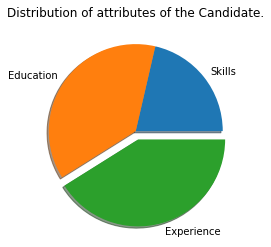



REPORT
hi
  Skills    Education    Experience      AVG    Resume score  Automatic screening    Insights
--------  -----------  ------------  -------  --------------  ---------------------  -----------------------
      57          100            73  76.6667              56  Manual review needed   Has banking experience.


In [460]:
start(skills,requiredSkills)
start(education,requiredEducation)
sentenceTranformerModel(candidateExperience.lower(),requiredExperience.lower())
drawPieChart()
analytics(prefer)

## **Example 2 - Microsoft**

In [470]:
candidateExperience = "4 years of software design and development experience in distributed systems and cloud. 6 years of working with Java Have worked on call and resoloved many production related bugs worked with shell scripting for linux Have worked in scaled agile team Execelent communication and oration skills Have worked with multiple cloud based technologies."

requiredExperience = " 3+ years of software design and development experience of production grade distributed systems and services hosted in the cloud 5+ years of working with C# or Java or any language to build service A BS/MSc in Computer Science or equivalent Demonstrated prior experience with operations & on-call support inherent in running a reliable production grade customer-facing service. Prior experience with low-level programming in Windows or Linux environments Demonstrated ability to troubleshoot performance and reliability issues Prior experience working in an agile development team with a customer facing product Prior experience with containers and software delivery in the cloud Good written and oral communication skills with an ability to collaborate with diverse teams"


In [471]:
#Organisation
requireTopTierEducation = False
min_criteria = 80
requiredSkills = "JAVA/C, SPRING BOOT, Hybernate, SQL, DBMS, Angular, node.js"
if(requireTopTierEducation):
  requiredEducation = "BE in computer science from" + ' '.join([str(elem) for elem in top_institutes])
  checkTopInstitutes(education,requiredEducation)
else:
  requiredEducation = "BE in computer science "
  checkEquvalentCourses(education,requiredEducation)

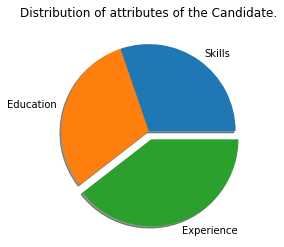



REPORT
  Skills    Education    Experience      AVG    Resume score  Automatic screening
--------  -----------  ------------  -------  --------------  ---------------------
     100          100            87  95.6667             100  PASSED


In [463]:
start(skills,requiredSkills)
start(education,requiredEducation)
sentenceTranformerModel(candidateExperience.lower(),requiredExperience.lower())
drawPieChart()
analytics()

## **Example 3 - Hotstar**

In [464]:
requiredExperience = "4-8 years of experience in software development with strong expertise in Java Experience with reactive programming Experience in building RESTful APIs with monitoring, fault tolerance and metrics Exposure to relational and NoSQL databases (Cassandra,Redis, DynamoDB) Exposure to server-side services using ElasticSearch and ESB - Camel, ActiveMQ Experience in JEE, Spring, Hibernate Knowledge of AJAX and Javascript/scripting language Strong experience with AWS Stack"

candidateExperience = "Have 3 years of development experiance in working with reactive programing, JEE, Spring and Hybernate Experienced in building restful APIs with Java microservices Experienced in working on relational and noSql databases Experienced in working on kafka. Experienced in Javascript and python as scripting languages. well versed with AWS lamba, EC2 and S3."


In [465]:
#Organisation
requireTopTierEducation = False
min_criteria = 80
requiredSkills = "JAVA, SPRING BOOT, Hybernate, SQL, DBMS, Angular, GIT, AI/ML, Jira, Jenkins, Kubernetes, node.js"
if(requireTopTierEducation):
  requiredEducation = "BE in computer science from" + ' '.join([str(elem) for elem in top_institutes])
  checkTopInstitutes(education,requiredEducation)
else:
  requiredEducation = "BE in computer science "
  checkEquvalentCourses(education,requiredEducation)

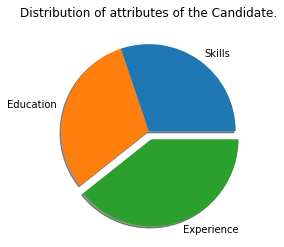



REPORT
  Skills    Education    Experience    AVG    Resume score  Automatic screening
--------  -----------  ------------  -----  --------------  ---------------------
      99          100            86     95              99  PASSED


In [466]:
start(skills,requiredSkills)
start(education,requiredEducation)
sentenceTranformerModel(candidateExperience.lower(),requiredExperience.lower())
drawPieChart()
analytics()

## **Example 4 - Amazon**

In [472]:
#Organisation
requireTopTierEducation = True
min_criteria = 80
requiredSkills = "Java, REACT JS, distributed, multi-tiered systems, algorithms, and relational databases"
if(requireTopTierEducation):
  requiredEducation = "BE in computer science from" + ' '.join([str(elem) for elem in top_institutes])
  checkTopInstitutes(education,requiredEducation)
else:
  requiredEducation = "BE in computer science "
  checkEquvalentCourses(education,requiredEducation)

In [473]:
requiredExperience = "Currently enrolled in a Bachelor’s or Master’s Degree in Computer Science, Computer Engineering, or related field at time of application Familiarity with the syntax of languages such as Java, C/C++ or Python. Knowledge of Computer Science fundamentals such as object-oriented design, algorithm design, data structures, problem solving, and complexity analysis. Previous technical internship(s). Experience with distributed, multi-tiered systems, algorithms, and relational databases. Experience in optimization mathematics such as linear programming and nonlinear optimization. Effectively articulate technical challenges and solutions. Adept at handling ambiguous or undefined problems as well as ability to think abstractly."

candidateExperience = "Pursuing Bachelors Degree in Information science. profecient in object oriented programming languages such as JAVA and python. An excelent problem solver with deep knowledge of data structures, algorithms, Relational databases and opimisation problems in the domain of linear programming and non linear programming. Ability to adapt to any kind of situation and deliever high quality of solutions and well versed to provide technical support in case of anomalies."


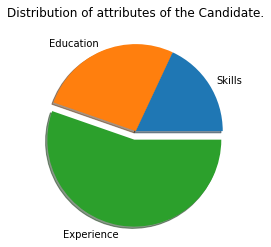



REPORT
  Skills    Education    Experience      AVG    Resume score  Automatic screening    Insights
--------  -----------  ------------  -------  --------------  ---------------------  -----------------------------------------------
      44           65            90  66.3333              44  FAILED                 Candidate does not meet the Education criteria.


In [474]:
start(skills,requiredSkills)
start(education,requiredEducation)
sentenceTranformerModel(candidateExperience.lower(),requiredExperience.lower())
drawPieChart()
analytics()